**Kaggle Competition - India Mental Health**




I found this dataset for an online kaggle competition. Considering the recent suicides of professionals in India, I wanted to see if we could accurately predict at risks to ensure additional support. A possible application of this could be for employers to ensure their employees are looked after.

In [165]:
import pandas as pd 
data = pd.read_csv("/home/devmenon/RandomProjects/HandsonML/Data/depression.csv")
print(data.head(50))
print(data.shape)

           Name  Gender  Age         City Working Professional or Student  \
0         Pooja  Female   37    Ghaziabad            Working Professional   
1       Reyansh    Male   60       Kalyan            Working Professional   
2         Manvi  Female   42       Bhopal            Working Professional   
3          Isha  Female   44        Thane            Working Professional   
4         Aarav    Male   48       Indore            Working Professional   
5         Sanya  Female   60       Bhopal            Working Professional   
6          Zara  Female   30         Pune            Working Professional   
7         Kiran    Male   30    Bangalore            Working Professional   
8          Kush    Male   56    Hyderabad            Working Professional   
9        Damini  Female   35     Srinagar            Working Professional   
10     Rudransh    Male   21       Nashik            Working Professional   
11      Pratham    Male   57         Pune            Working Professional   

In [166]:
print(data.isnull().sum())

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64


In [167]:
data = data.drop(columns= ['Academic Pressure', 'Study Satisfaction','CGPA']) #too many missing values to be useful

print(data.shape)
print(data.head)

(2556, 16)
<bound method NDFrame.head of              Name  Gender  Age       City Working Professional or Student  \
0           Pooja  Female   37  Ghaziabad            Working Professional   
1         Reyansh    Male   60     Kalyan            Working Professional   
2           Manvi  Female   42     Bhopal            Working Professional   
3            Isha  Female   44      Thane            Working Professional   
4           Aarav    Male   48     Indore            Working Professional   
...           ...     ...  ...        ...                             ...   
2551  Raghavendra    Male   25  Bangalore            Working Professional   
2552         Pihu  Female   23       Pune            Working Professional   
2553         Sara  Female   24   Srinagar            Working Professional   
2554       Eshita  Female   56  Bangalore            Working Professional   
2555        Kiran    Male   18      Surat                         Student   

             Profession  Work Pres

In [168]:
print(data.isnull().sum())
print(data.shape)
print(data.dtypes)

Name                                       0
Gender                                     0
Age                                        0
City                                       0
Working Professional or Student            0
Profession                               673
Work Pressure                            502
Job Satisfaction                         502
Sleep Duration                             0
Dietary Habits                             0
Degree                                     0
Have you ever had suicidal thoughts ?      0
Work/Study Hours                           0
Financial Stress                           0
Family History of Mental Illness           0
Depression                                 0
dtype: int64
(2556, 16)
Name                                      object
Gender                                    object
Age                                        int64
City                                      object
Working Professional or Student           object
Profession 

**Imputation**


In [169]:
data.fillna({'Profession':'Unknown'}, inplace=True)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data[['Work Pressure', 'Job Satisfaction']] = imputer.fit_transform(data[['Work Pressure', 'Job Satisfaction']])


data.to_csv('/home/devmenon/RandomProjects/HandsonML/Data/depresson_clean.csv') #save cleaned data to csv


**Encoding**

In [170]:
#Ordinal Encoding


from sklearn.preprocessing import  OrdinalEncoder
import numpy as np
import pandas as pd

# Sample data copy
data_encoded = data.copy()



# Dietary Habits Encoder
data_encoded['Dietary Habits'] = data_encoded['Dietary Habits'].map({'Unhealthy':0, 'Moderate':1, 'Healthy':2})
# Family History Mental Encoder
data_encoded['Family History of Mental Illness'] = data_encoded['Family History of Mental Illness'].map({ 'No' : 0,  'Yes': 1})
#Suicidal thoughts
data_encoded['Have you ever had suicidal thoughts ?'] = data_encoded['Have you ever had suicidal thoughts ?'].map({ 'No' : 0,  'Yes': 1})
#Sleep Encoder
data_encoded['Sleep Duration'] = data_encoded['Sleep Duration'].map({ 'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3
})


#Degree Encoder
print(data_encoded['Degree'].unique())

import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Define the custom ordering from lowest to highest educational qualification
education_order = [
    'Class 12',  # Starting point
    'BBA', 'BCA','BHM', 'B.Com', 'BA', 'BSc', 'BE', 'B.Tech', 'B.Arch', 'B.Ed', 'B.Pharm', 'LLB',
    'MCA', 'M.Com', 'MA', 'MSc', 'ME', 'M.Tech', 'MBA', 'MD', 'M.Pharm', 'M.Ed', 'LLM', 'MHM', 
    'MBBS', 'PhD'
]

# Create the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[education_order])

# Direct encoding
data_encoded['Degree'] = ordinal_encoder.fit_transform(data_encoded[['Degree']])

# Mapping (optional, but helpful)
education_mapping = {qual: idx for idx, qual in enumerate(education_order)}


['MA' 'B.Com' 'M.Com' 'MD' 'BE' 'MCA' 'BA' 'LLM' 'BCA' 'Class 12' 'B.Ed'
 'M.Tech' 'LLB' 'B.Arch' 'ME' 'MBA' 'M.Pharm' 'MBBS' 'PhD' 'BSc' 'MSc'
 'MHM' 'BBA' 'BHM' 'B.Tech' 'M.Ed' 'B.Pharm']


Nominal Encoding

In [171]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Gender', 'City', and 'Working Professional or Student'
data_encoded['Gender'] = label_encoder.fit_transform(data_encoded['Gender'])
data_encoded['City'] = label_encoder.fit_transform(data_encoded['City'])
data_encoded['Working Professional or Student'] = label_encoder.fit_transform(data_encoded['Working Professional or Student'])
data_encoded['Profession']= label_encoder.fit_transform(data_encoded['Profession'])
# Verify the changes
print(data_encoded.head())
data_encoded.isnull().sum()

      Name  Gender  Age  City  Working Professional or Student  Profession  \
0    Pooja       0   37     7                                1          32   
1  Reyansh       1   60    11                                1          16   
2    Manvi       0   42     3                                1          32   
3     Isha       0   44    25                                1          32   
4    Aarav       1   48     9                                1          34   

   Work Pressure  Job Satisfaction  Sleep Duration  Dietary Habits  Degree  \
0            2.0               4.0               2               1    15.0   
1            4.0               3.0               1               0     4.0   
2            2.0               3.0               1               1    14.0   
3            3.0               5.0               2               2    20.0   
4            4.0               3.0               2               1     7.0   

   Have you ever had suicidal thoughts ?  Work/Study Hours  Fi

Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

**Model Optimizing**

In [172]:
# Random Forest: Grid Search for optimal parameters
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='roc_auc')
rf_grid_search.fit(X_train, y_train)

# Best parameters
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
optimized_rf_model = rf_grid_search.best_estimator_


Best Random Forest Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [173]:
# KNN: Grid Search for optimal parameters
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='roc_auc')
knn_grid_search.fit(X_train, y_train)

# Best parameters
print("Best KNN Parameters:", knn_grid_search.best_params_)
optimized_knn_model = knn_grid_search.best_estimator_


Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


--- Optimized Logistic Regression ---
Accuracy: 0.9453125
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       429
           1       0.84      0.82      0.83        83

    accuracy                           0.95       512
   macro avg       0.90      0.89      0.90       512
weighted avg       0.94      0.95      0.95       512

ROC-AUC Score: 0.979975847445727
Confusion Matrix:
 [[416  13]
 [ 15  68]]


--- Optimized Random Forest ---
Accuracy: 0.904296875
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       429
           1       0.75      0.61      0.68        83

    accuracy                           0.90       512
   macro avg       0.84      0.79      0.81       512
weighted avg       0.90      0.90      0.90       512

ROC-AUC Score: 0.9609065633162018
Confusion Matrix:
 [[412  17]
 [ 32  51]]


--- Optimized K-Nearest Neighbo

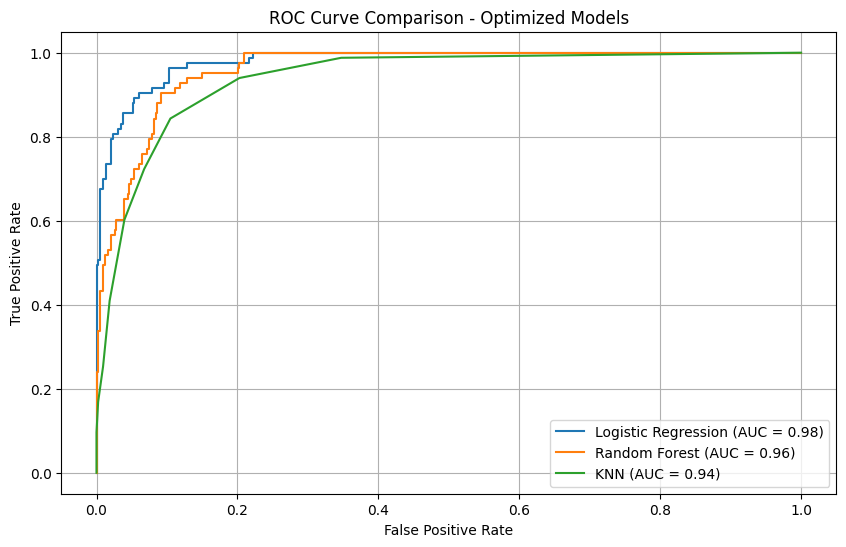

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Hyperparameter Optimization
# Logistic Regression parameter grid
log_param_grid = {
    'penalty': ['l2'],  # Regularization type
    'C': [0.1, 1, 10, 100],  # Inverse regularization strength
    'solver': ['lbfgs', 'saga'],  # Solvers compatible with l2
    'max_iter': [100, 200, 300]  # Iterations
}
log_grid = GridSearchCV(LogisticRegression(random_state=42), log_param_grid, scoring='roc_auc', cv=5)
log_grid.fit(X_train, y_train)
best_log_model = log_grid.best_estimator_

# Random Forest parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, scoring='roc_auc', cv=5)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_

# KNN parameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, scoring='roc_auc', cv=5)
knn_grid.fit(X_train, y_train)
best_knn_model = knn_grid.best_estimator_

#Best Parameters
# Logistic Regression
y_pred_log = best_log_model.predict(X_test)
y_pred_prob_log = best_log_model.predict_proba(X_test)[:, 1]
evaluate_model("Optimized Logistic Regression", y_test, y_pred_log, y_pred_prob_log)

# Random Forest
y_pred_rf = best_rf_model.predict(X_test)
y_pred_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]
evaluate_model("Optimized Random Forest", y_test, y_pred_rf, y_pred_prob_rf)

# KNN
y_pred_knn = best_knn_model.predict(X_test)
y_pred_prob_knn = best_knn_model.predict_proba(X_test)[:, 1]
evaluate_model("Optimized K-Nearest Neighbors", y_test, y_pred_knn, y_pred_prob_knn)

# ROC plot
plt.figure(figsize=(10, 6))

# Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log)
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob_log)))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob_rf)))

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob_knn)))

plt.title('ROC Curve Comparison - Optimized Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Log Regression outperforms other models. The F1 score for LogR for class 0 and 1 is much better. Recall (which is important since we do not want to miss out on people having depression) is highest in logR (0.82) as compared to the rest (~0.6). In certain situations, we could consider random forest if there is a lot of noise in data set. KNN should not be considered at all. 